GLASS IDENTIFICATION

In [1]:
#Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('https://raw.githubusercontent.com/KAsare1/Glass-Identification/main/glass.csv')

In [3]:
data.head(10)

,Id number,refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.10,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [ ]:
#Checking sample data and shape

In [4]:
data.sample(15)

,Id number,refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
22,23,1.51736,12.78,3.62,1.29,72.79,0.59,8.70,0.00,0.00,1
185,186,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7
16,17,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00,1
118,119,1.51673,13.30,3.64,1.53,72.53,0.65,8.03,0.00,0.29,2
178,179,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.00,0.00,6
82,83,1.51646,13.41,3.55,1.25,72.81,0.68,8.10,0.00,0.00,2
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
206,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00,7
73,74,1.51631,13.34,3.57,1.57,72.87,0.61,7.89,0.00,0.00,2
35,36,1.51567,13.29,3.45,1.21,72.74,0.56,8.57,0.00,0.00,1


In [8]:
data.shape

(214, 11)

In [5]:
#Checking type of glass(classes)
data['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [6]:
#Checking data type and null vales
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id number         214 non-null    int64  
 1   refractive index  214 non-null    float64
 2   Na                214 non-null    float64
 3   Mg                214 non-null    float64
 4   Al                214 non-null    float64
 5   Si                214 non-null    float64
 6   K                 214 non-null    float64
 7   Ca                214 non-null    float64
 8   Ba                214 non-null    float64
 9   Fe                214 non-null    float64
 10  Type of glass     214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [7]:
data.isnull().sum()

Id number           0
refractive index    0
Na                  0
Mg                  0
Al                  0
Si                  0
K                   0
Ca                  0
Ba                  0
Fe                  0
Type of glass       0
dtype: int64

There are no null values and all columns except 'Id'and 'Type of glass'are float data type

In [9]:
#Dropping unwanted column
data.drop(columns=['Id number'],axis=1, inplace=True)

In [10]:
data.head()

,refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [11]:
#Let's check more details about the features in the dataset
data.describe()

,refractive index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057477,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097404,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Features don't seem to be distributed in the same scale. The mean of SI is 72.65 while for that of others,it is much less.

<Axes: >

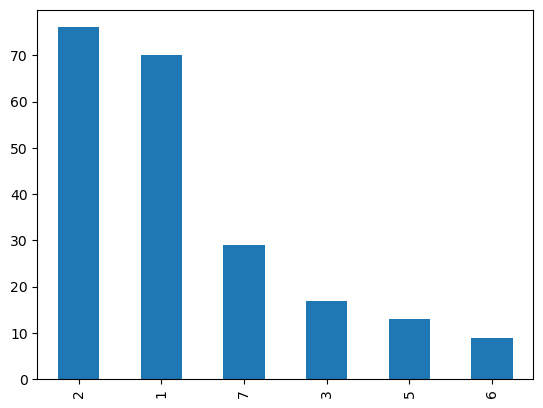

In [12]:
#Let's check the balance in classes-
data['Type of glass'].value_counts().plot(kind='bar')


In [13]:
data['Type of glass'].value_counts()


2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

Clearly, we can see that 3,5 and 6 types of data are very less as compared to type 1,2 and 7. Data seems to be imbalanced and we might need to balance it later.

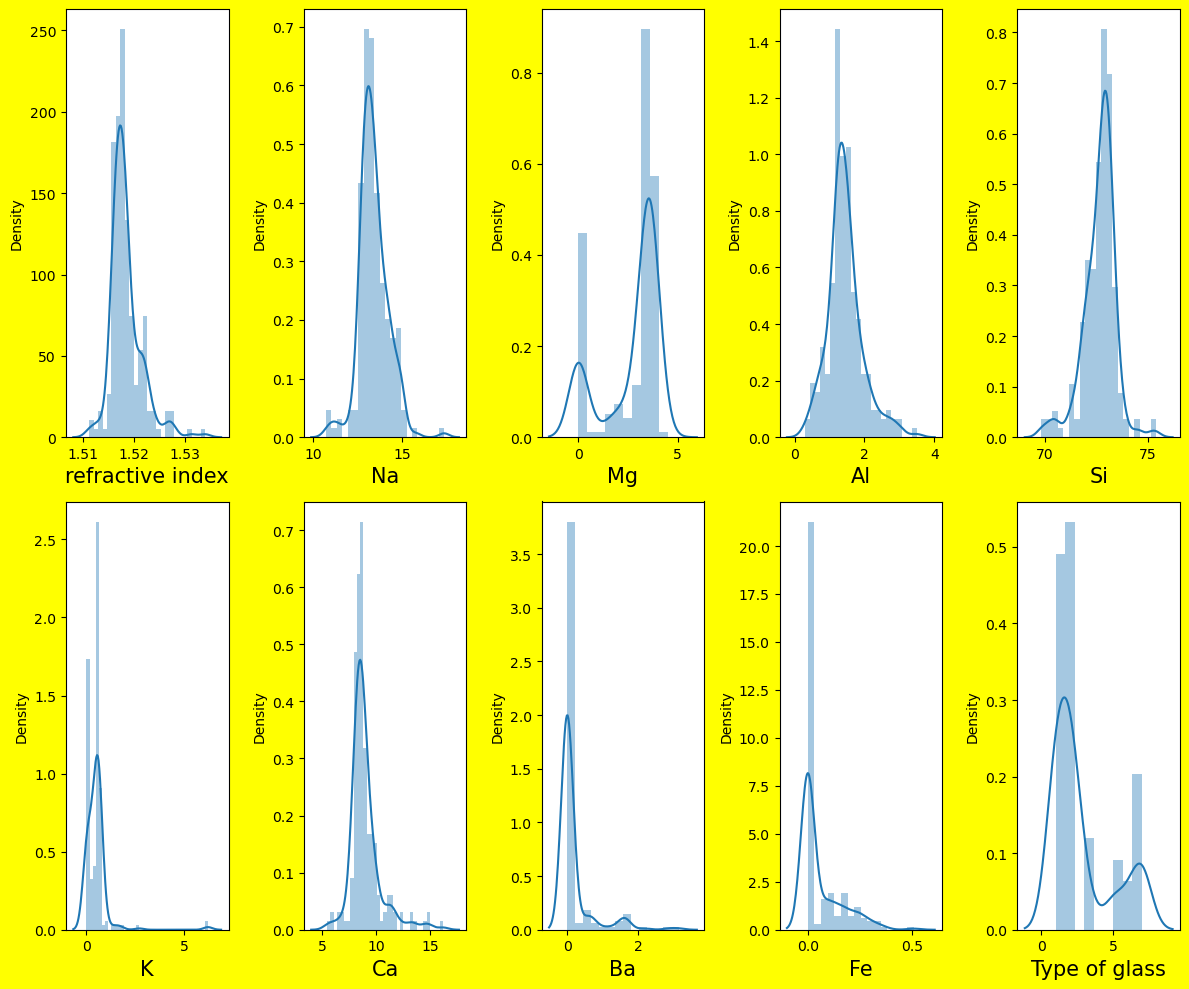

In [14]:
#Let's check distribution of features
plt.figure(figsize=(12,10),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()
    


None of the features seem to have normal distribution. Features K, Ca, Ba and Fe have high skewness which also means there can be outliers. Let's check for outliers using boxplot.

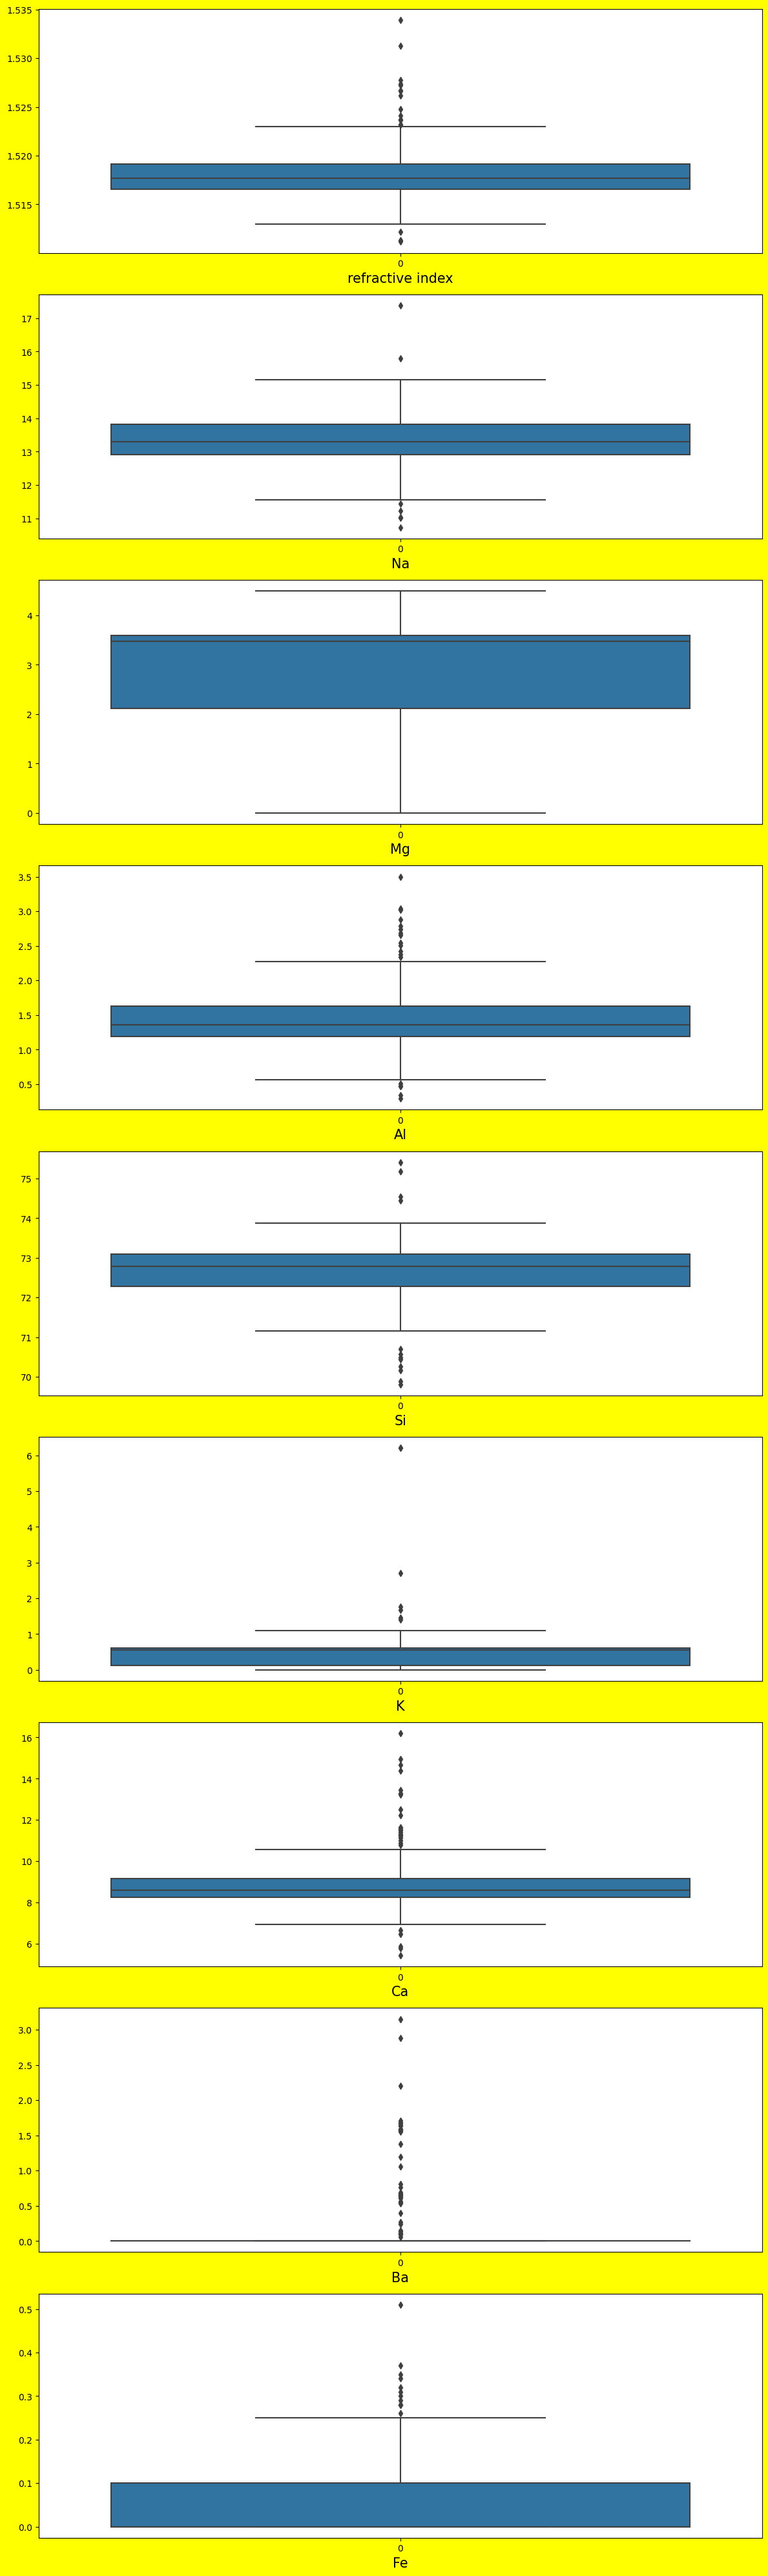

In [15]:
plt.figure(figsize=(12,40),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(9,1,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

Except magnesium(Mg), all other features have outliers. Refractive index,Na,Al,Si and Ca have outliers both in upside and downside while Fe, Ba and K have outliers in the upside 

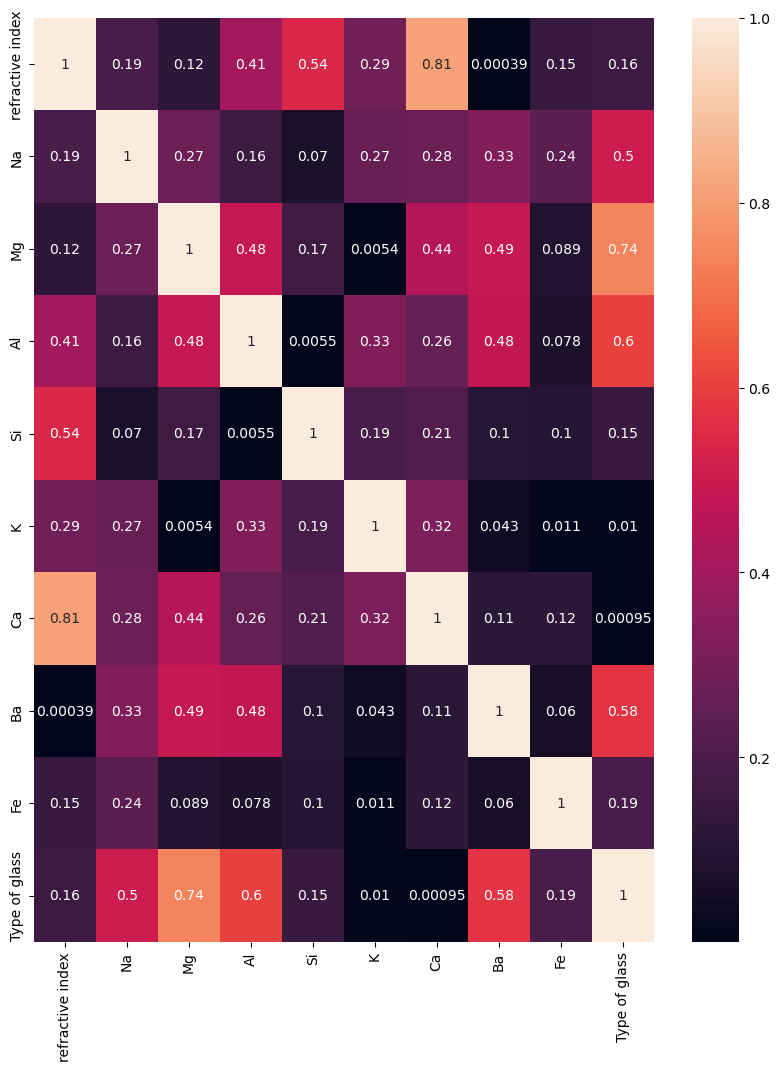

In [16]:
#Let's check if there is correlation between features-
data_corr=data.corr().abs()
plt.figure(figsize=(10,12))
sns.heatmap(data_corr,annot=True,annot_kws={'size':10})
plt.show()

Observation: We can see that RI( Refractive index) and Ca(Calcium) seem to be highly correlated with each other. Let us confirm our observation using scatter plot 

Text(0.5, 1.0, 'Refractive index v/s Calcium')

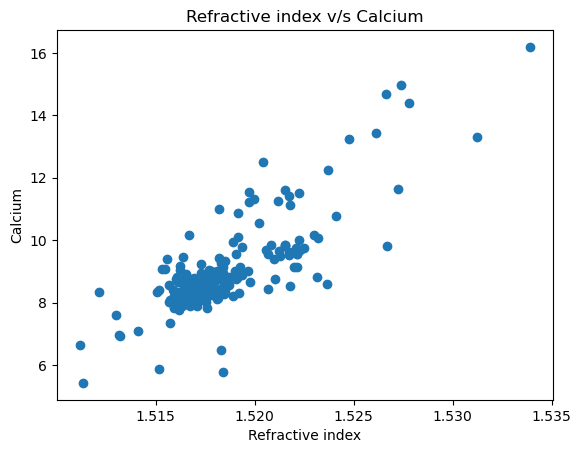

In [17]:
plt.scatter(data['refractive index'], data['Ca'])
plt.xlabel('Refractive index')
plt.ylabel('Calcium')
plt.title('Refractive index v/s Calcium')
           


When Calcium level was between 6-8, refractive index was between 0-1.515. As Calcium level increases from 8-10, refractive index also increases(1.515-1.520). We can conclude from the graph that as Calcium increases, Refractive index also increases. This proves multicollinearity among features.

In [19]:
#So+ince RI and Ca are highly correlated, it's best that vwe remove the feature that seems to affect the label less.
data.drop(columns=['Ca'], axis=1,inplace=True)

In [20]:
data.head()

,refractive index,Na,Mg,Al,Si,K,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.0,0.1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,0.0,0.0,1


In [22]:
#Let's fix the outliers first
from scipy.stats import zscore

In [23]:
z_score=zscore(data[['refractive index','Na','Al','Si','K','Ba','Fe']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]

In [24]:
data.shape

(198, 9)

Out of 214 records, we currently have 198 records(rows) after removing outliers. Let us also check data skewness now.

In [25]:
#Separating Features and label-
X=data.drop(columns=['Type of glass'],axis=1)
y=data['Type of glass']

In [26]:
X.skew()


refractive index    1.187750
Na                 -0.006770
Mg                 -1.407472
Al                  0.641092
Si                 -0.453578
K                   0.302146
Ba                  3.229584
Fe                  1.494968
dtype: float64

In [27]:
#As some features still have skewness, let's fix the skewness using Square root method.
X=np.sqrt(X)

In [28]:
X.skew()

refractive index    1.184195
Na                 -0.136400
Mg                 -1.645068
Al                 -0.094441
Si                 -0.470112
K                  -0.860951
Ba                  2.501201
Fe                  0.977789
dtype: float64

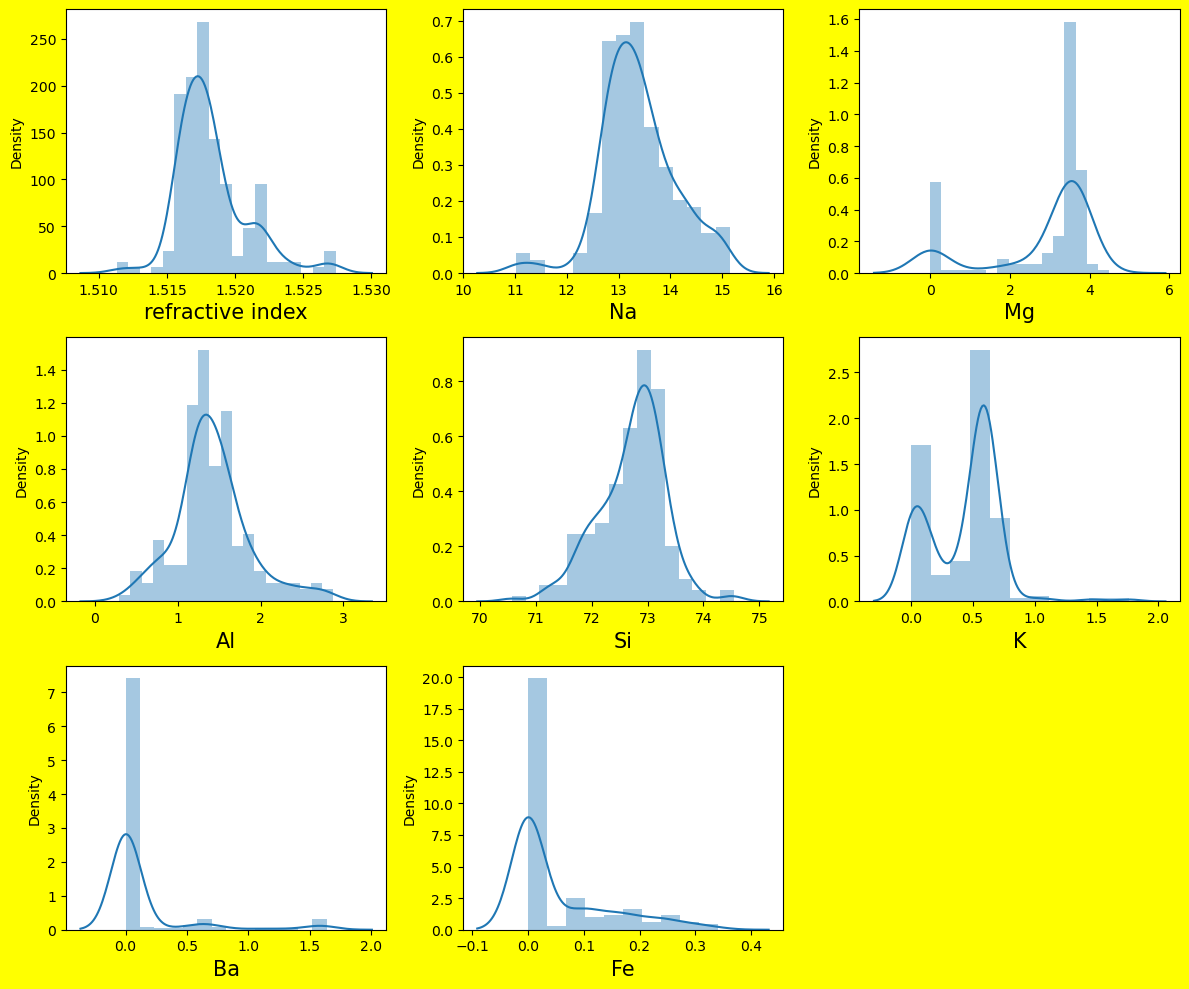

In [29]:
plt.figure(figsize=(12,10),facecolor='yellow')
plotnumber=1

for column in X:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

We have fixed the skewness and the distribution seems much better than before.

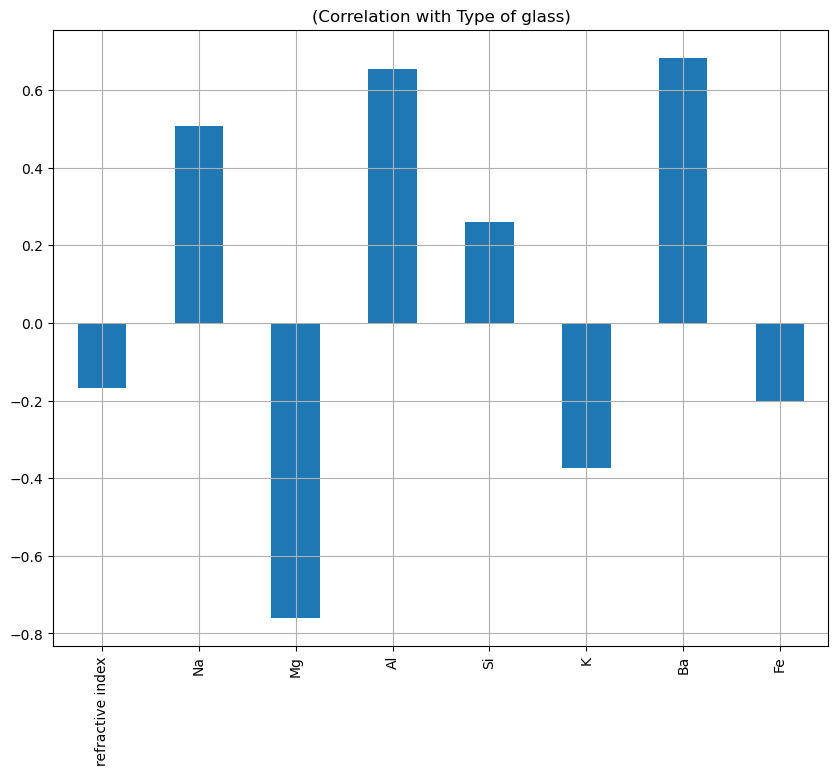

In [30]:
data.drop('Type of glass',axis=1).corrwith(data['Type of glass']).plot(kind='bar',grid=True,figsize=(10,8),title="(Correlation with Type of glass)")
plt.show()

All the features are correlated with the label. This explains that all the features are important in the dataset and no feature should be eliminated.

In [31]:
#Data transformation
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [33]:
X_scaled

array([[ 1.09694867,  0.36633803,  0.84817551, ..., -1.13660973,
        -0.39280588,  0.97797321],
       [-0.24261352,  0.70955949,  0.52952971, ...,  0.3704811 ,
        -0.39280588, -0.67443512],
       [-0.80646585,  0.21432465,  0.51051664, ...,  0.14058197,
        -0.39280588, -0.67443512],
       ...,
       [-0.5422502 ,  2.09206883, -2.19881155, ..., -1.96086507,
         3.5040872 , -0.67443512],
       [ 0.9551836 ,  1.34655551, -2.19881155, ..., -1.96086507,
         3.56488483, -0.67443512],
       [-0.67632249,  1.37342873, -2.19881155, ..., -1.96086507,
         3.47950087, -0.67443512]])

Splitting data into train and test sets

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y, test_size=0.25,random_state=35)

In [35]:
y_train

103    2
71     2
68     1
120    2
83     2
      ..
206    7
205    7
33     1
195    7
15     1
Name: Type of glass, Length: 148, dtype: int64

In [36]:
#Let's fix the imbalalance in the label
from collections import Counter
from imblearn.over_sampling import SMOTE

In [37]:
Counter(data['Type of glass'])

Counter({1: 70, 2: 72, 3: 16, 5: 9, 6: 8, 7: 23})

In [38]:
sampling_strategy_dict={1:80,2:80,3:80,5:80,6:80,7:80}

In [39]:
over_smp=SMOTE(random_state=42,k_neighbors=3,sampling_strategy=sampling_strategy_dict)

In [40]:
X_train_ns,y_train_ns=over_smp.fit_resample(X_train,y_train)


In [41]:
print("Type of glass after oversampling",Counter(y_train_ns))

Type of glass after oversampling Counter({2: 80, 1: 80, 3: 80, 7: 80, 6: 80, 5: 80})


In [42]:
#Defining a function for train and test scores and calling it for every model

def print_score(clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred=clf.predict(X_train_ns)
        print("\n--------------Train result-----------")
        print(f"Accuracy Score:{accuracy_score(y_train_ns,y_pred)*100:.2f}%")
    elif not train:
        pred=clf.predict(X_test)
        print("\n--------------Test result------------")
        print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
        print("\n\nTest Classification report\n",classification_report(y_test,pred,digits=2))

Model training

In [43]:
#Using SVC
from sklearn.svm import SVC
svc=SVC()

In [44]:
svc.fit(X_train_ns,y_train_ns)

SVC()

In [45]:
print_score(svc,X_train_ns,X_test,y_train_ns,y_test,train=True)
print_score(svc,X_train_ns,X_test,y_train_ns,y_test,train=False)


--------------Train result-----------
Accuracy Score:88.96%

--------------Test result------------
Accuracy score:66.00%


Test Classification report
               precision    recall  f1-score   support

           1       0.71      0.67      0.69        15
           2       0.67      0.80      0.73        20
           3       0.17      0.25      0.20         4
           5       1.00      0.40      0.57         5
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3

    accuracy                           0.66        50
   macro avg       0.76      0.57      0.63        50
weighted avg       0.71      0.66      0.67        50



In [46]:
#Using Logistic regression
from sklearn.linear_model import LogisticRegression


In [47]:
lr = LogisticRegression()
lr.fit(X_train_ns, y_train_ns)


LogisticRegression()

In [48]:
print_score(lr,X_train_ns,X_test,y_train_ns,y_test,train=True)
print_score(lr,X_train_ns,X_test,y_train_ns,y_test,train=False)


--------------Train result-----------
Accuracy Score:83.96%

--------------Test result------------
Accuracy score:66.00%


Test Classification report
               precision    recall  f1-score   support

           1       0.75      0.80      0.77        15
           2       0.69      0.55      0.61        20
           3       0.25      0.50      0.33         4
           5       0.60      0.60      0.60         5
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3

    accuracy                           0.66        50
   macro avg       0.71      0.69      0.69        50
weighted avg       0.70      0.66      0.67        50



In [49]:
#Using KNN
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier()
knn.fit(X_train_ns,y_train_ns)

KNeighborsClassifier()

In [51]:
print_score(knn,X_train_ns,X_test,y_train_ns,y_test,train=True)
print_score(knn,X_train_ns,X_test,y_train_ns,y_test,train=False)


--------------Train result-----------
Accuracy Score:94.58%

--------------Test result------------
Accuracy score:72.00%


Test Classification report
               precision    recall  f1-score   support

           1       0.65      0.73      0.69        15
           2       0.93      0.65      0.76        20
           3       0.38      0.75      0.50         4
           5       0.67      0.80      0.73         5
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3

    accuracy                           0.72        50
   macro avg       0.77      0.77      0.75        50
weighted avg       0.78      0.72      0.73        50



In [52]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt = DecisionTreeClassifier()
dt.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier()

In [54]:
print_score(dt,X_train_ns,X_test,y_train_ns,y_test,train=True)
print_score(dt,X_train_ns,X_test,y_train_ns,y_test,train=False)


--------------Train result-----------
Accuracy Score:100.00%

--------------Test result------------
Accuracy score:76.00%


Test Classification report
               precision    recall  f1-score   support

           1       0.81      0.87      0.84        15
           2       0.69      0.90      0.78        20
           3       0.67      0.50      0.57         4
           5       1.00      0.20      0.33         5
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3

    accuracy                           0.76        50
   macro avg       0.86      0.63      0.69        50
weighted avg       0.79      0.76      0.74        50



In [81]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf = RandomForestClassifier()
rf.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [83]:
print_score(rf,X_train_ns,X_test,y_train_ns,y_test,train=True)
print_score(rf,X_train_ns,X_test,y_train_ns,y_test,train=False)


--------------Train result-----------
Accuracy Score:100.00%

--------------Test result------------
Accuracy score:86.00%


Test Classification report
               precision    recall  f1-score   support

           1       0.88      0.93      0.90        15
           2       0.86      0.90      0.88        20
           3       0.60      0.75      0.67         4
           5       1.00      0.60      0.75         5
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3

    accuracy                           0.86        50
   macro avg       0.89      0.81      0.83        50
weighted avg       0.87      0.86      0.86        50



In [58]:
#Using Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_ns,y_train_ns)

GradientBoostingClassifier()

In [60]:
print_score(gbc,X_train,X_test,y_train,y_test,train=True)
print_score(gbc,X_train,X_test,y_train,y_test,train=False)


--------------Train result-----------
Accuracy Score:100.00%

--------------Test result------------
Accuracy score:78.00%


Test Classification report
               precision    recall  f1-score   support

           1       0.92      0.73      0.81        15
           2       0.73      0.95      0.83        20
           3       0.40      0.50      0.44         4
           5       1.00      0.60      0.75         5
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3

    accuracy                           0.78        50
   macro avg       0.84      0.69      0.74        50
weighted avg       0.82      0.78      0.78        50



Random Forest Classifier seems to be the best fitted model as it gives the highest test accuracy score and also difference in train and test score is less as compared to other models.

In [92]:
#Let's compare model results
model = pd.DataFrame({
    'Model': ['Support Vector Machine', 'Logistic Regression', 'KNN',
               'Decision Tree','Random Forest Classifier', 'Gradient Boosting Classifier'],

    
    'Score(in %)':  [66,66,72,76,86,76]})

In [93]:
model

,Model,Score(in %)
0,Support Vector Machine,66
1,Logistic Regression,66
2,KNN,72
3,Decision Tree,76
4,Random Forest Classifier,86
5,Gradient Boosting Classifier,76


We can conclude that Random Forect Classifier gives the best test accuracy score and is the best fitted model for this data. Also, we can see that the difference between train and test score for this model is not as high as for other models. Thus, we can consider using Random Forest Classifier to predict type of glass for new set of data

In [96]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [97]:
y_pred = rf.predict(X)

In [98]:
print("Predicted glass type")
print(y_pred)

Predicted glass type
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7]


In [101]:
classification = {
    1: "building_windows_float_processed",
    2: "building_windows_non_float_processed",
    3: "vehicle_windows_float_processed",
    4: "vehicle_windows_non_float_processed (none in this database)",
    5: "containers",
    6: "tableware",
    7: "headlamps"
}

predicted_classifications = [classification[prediction] for prediction in y_pred]


In [102]:
print("Predicted Glass Types with Classifications:")
for glass_type, classification in zip(y_pred, predicted_classifications):
    print(f"{glass_type} - {classification}")

Predicted Glass Types with Classifications:
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_processed
1 - building_windows_float_proc

In [103]:
#Saving the model
import pickle
final_model = RandomForestClassifier()

model_filename = 'Glass Prediction'
with open(model_filename, 'wb') as file:
    pickle.dump(final_model, file)